In [1]:
import numpy as np
import matplotlib.pyplot as plt

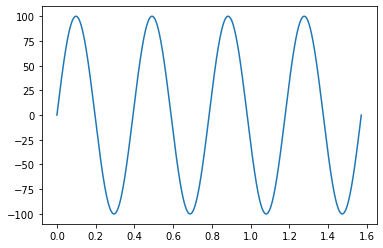

In [2]:
x = np.linspace(0,8/16*np.pi,1000)
y = 100*np.sin(16*x)
plt.plot(x,y)

In [3]:
np.random.seed(2022)
noise = 40 * np.random.random((len(x),)) - 20
signal = y + noise

In [4]:
plt.plot(x,signal)

In [5]:
for i in range(5,len(x)-5):
    signal[i] = np.mean(signal[i-5:i+5])
plt.plot(x,signal)
peak_max = []
peak_min = []
for i in range(30,len(x)-30):
    if (signal[i-30]<signal[i]) and (signal[i]>signal[i+30]):
        peak_max.append(x[i])
    if (signal[i-30]>signal[i]) and (signal[i]<signal[i+30]):
        peak_min.append(x[i])

In [6]:
l_max = [0]
l_min = [0]
for i in range(1,len(peak_max)):
    if (peak_max[i]-peak_max[i-1]) > 0.2:
        l_max.append(i)
l_max.append(len(peak_max))
for i in range(1,len(peak_min)):
    if (peak_min[i]-peak_min[i-1]) > 0.2:
        l_min.append(i)
l_min.append(len(peak_min))

In [7]:
mean_max = []
mean_min = []
for i in range(1,len(l_max)):
    mean_max.append(np.mean(peak_max[l_max[i-1]:l_max[i]]))
for i in range(1,len(l_min)):
    mean_min.append(np.mean(peak_min[l_min[i-1]:l_min[i]]))

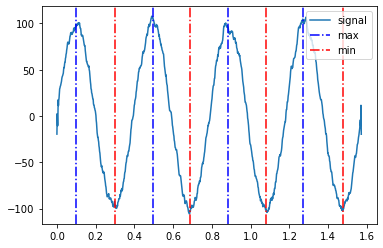

In [8]:
plt.plot(x,signal,label='signal')
for i in range(1,len(mean_max)):
    plt.axvline(mean_max[i], color='blue', ls='-.')
plt.axvline(mean_max[0], color='blue', ls='-.',label='max')
for i in range(1,len(mean_min)):
    plt.axvline(mean_min[i], color='red', ls='-.')
plt.axvline(mean_min[0], color='red', ls='-.',label='min')
plt.legend(loc=1)

In [9]:
SSE = 0
for i in range(4):
    SSE += (((0.5+2*i)*np.pi)/16 - mean_max[i]) ** 2
    SSE += ((2*(i+1)*np.pi)/16 - mean_min[i]) ** 2
print('SSE:%.5f' % SSE)

SSE:0.03798
